#  <span style="color:#3366ff"> <strong> Anticipation du retard de vol d'avions (Arnaud ROUSSEAU) </strong>

# <span style="color:#3366ff"> 28 juin 2018 (Part 2 Cleanée Base 10IDlight)

<span style="color:#3366ff"> Ce notebook à l'exploitation de la base de données de Vols Aériens Cleanée nommée <strong>"10ID light" </strong> afin de prédire les retards des vols.     
    
<span style="color:#3366ff">  Cette base de donnée contient les paramètres suivants:    
<span style="color:#3366ff">  'UNIQUE_CARRIER',(pour l'index )    
<span style="color:#3366ff">  'MONTH',     
<span style="color:#3366ff">  'DAY_OF_MONTH',                                     
<span style="color:#3366ff">  'DAY_OF_WEEK',                                                       
<span style="color:#3366ff">  'CRS_DEP_TIME',          
<span style="color:#3366ff">  'CRS_ARR_TIME' ,                                   
<span style="color:#3366ff">  'AIR_TIME',                                     
<span style="color:#3366ff">  'FLIGHTS',             

<span style="color:#3366ff">  ainsi que 10 AIRPORT ID:    
<span style="color:#3366ff">  Dest_Airp_ID_12173	
<span style="color:#3366ff">  Ori_Airp_ID_12173	    
<span style="color:#3366ff">  Ori_Airp_ID_13830	    
<span style="color:#3366ff">  Dest_Airp_ID_13830	
<span style="color:#3366ff">  Ori_Airp_ID_12758	    
<span style="color:#3366ff">  Ori_Airp_ID_12982	      
<span style="color:#3366ff">  Ori_Airp_ID_12402	    
<span style="color:#3366ff">  Dest_Airp_ID_12758	
<span style="color:#3366ff">  Dest_Airp_ID_12402	
<span style="color:#3366ff">  Dest_Airp_ID_12982    

### Importation des librairies

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from collections import Counter
import itertools

from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn import linear_model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score 

from itertools import cycle

# Ouverture des Bases Cleanées

### CSV CLEAN_10ID_light

'UNIQUE_CARRIER',      # pour l'identification = index     
'MONTH',     
'DAY_OF_MONTH',                                     
'DAY_OF_WEEK',                                                       
'CRS_DEP_TIME',          
'CRS_ARR_TIME' ,                                   
'AIR_TIME',                                     
'FLIGHTS',             

'+ 10 AIRPORT ID 

In [2]:
data_plane_CLEAN_10ID_light= pd.read_csv(
    'DATA_clean/data_plane_CLEAN_10ID_light.csv', 
    #sep='\t',
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

shape10IDlight = data_plane_CLEAN_10ID_light.shape

print("Cette base de données contient",shape10IDlight[0], 
      "vols décrits avec", shape10IDlight[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 17 paramètres.


In [3]:
data_plane_CLEAN_10ID_light.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,CRS_ARR_TIME,AIR_TIME,FLIGHTS,Ori_Airp_ID_12173,Dest_Airp_ID_12173,Ori_Airp_ID_13830,Dest_Airp_ID_13830,Dest_Airp_ID_12982,Ori_Airp_ID_12982,Dest_Airp_ID_12758,Dest_Airp_ID_12402,Ori_Airp_ID_12758,Ori_Airp_ID_12402
UNIQUE_CARRIER,,,,,,,,,,,,,,,,,
DL,1,15,5,1900.0,2056.0,78.0,1.0,0,0,0,0,0,0,0,0,0,0
AS,1,6,3,635.0,1219.0,211.0,1.0,0,0,0,0,0,0,0,0,0,0
WN,1,23,6,1330.0,1645.0,120.0,1.0,0,0,0,0,0,0,0,0,0,0
WN,1,27,3,1605.0,1730.0,63.0,1.0,0,0,0,0,0,0,0,0,0,0
B6,1,25,1,1215.0,1459.0,153.0,1.0,0,0,0,0,0,0,0,0,0,0


### Preprocessing: standardisation

In [4]:
scaler10IDlight = preprocessing.StandardScaler().fit(data_plane_CLEAN_10ID_light)
X_scaled = scaler10IDlight.transform(data_plane_CLEAN_10ID_light) 

# <span style="color:#6600cc">     Cas A: "y_1" avec ARR_DELAY

<span style="color:#6600cc">     ARR_DELAY = Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.

<span style="color:#6600cc">     <strong> ==> Régression Linéaire sur ARR_DELAY

In [5]:
data_plane_CLEAN_y_1_full= pd.read_csv(
    'DATA_clean/data_plane_CLEAN_y_1_full.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

shapey1 = data_plane_CLEAN_y_1_full.shape

print("Cette base de données contient",shapey1[0], 
      "vols décrits avec", shapey1[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


In [6]:
data_plane_CLEAN_y_1_full.head()

,ARR_DELAY
UNIQUE_CARRIER,
DL,87.0
AS,8.0
WN,17.0
WN,-14.0
B6,43.0


## Machine Learning: Régréssion Linéaire "Cas A" avec ARR_DELAY

### Split Train / Test "Cas A" avec ARR_DELAY

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    data_plane_CLEAN_y_1_full['ARR_DELAY'],
                                                    test_size=0.25)

### Regression Lineaire "Cas A" avec ARR_DELAY

In [8]:
# On crée un modèle de régression linéaire
lr10IDlightA = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr10IDlightA.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Erreur Regression Lineaire "Cas A" avec ARR_DELAY

In [9]:
baseline_score = np.mean((lr10IDlightA.score(X_train, y_train)))
baseline_error = (100*(1 - baseline_score))
baseline_error

98.8220690416656

## Régularisation Ridge "Cas A":  avec ARR_DELAY

In [10]:
# calcul de alpha

ridge10IDlightA = linear_model.Ridge()

n_alphas = 200
alpha_range = np.logspace(3, 9, n_alphas)

coef_ridge10IDlightA=[]
error_ridge10IDlightA=[]
for alpha_value in alpha_range:
    clf10IDlightA = ridge10IDlightA.set_params(alpha=alpha_value)
    clf10IDlightA.fit(X_train, y_train) 
    
    coef_ridge10IDlightA.append(clf10IDlightA.coef_.tolist())
    
    error_ridge10IDlightA.append(
        np.mean(100*(1 - ridge10IDlightA.score(X_test, y_test)))
    )

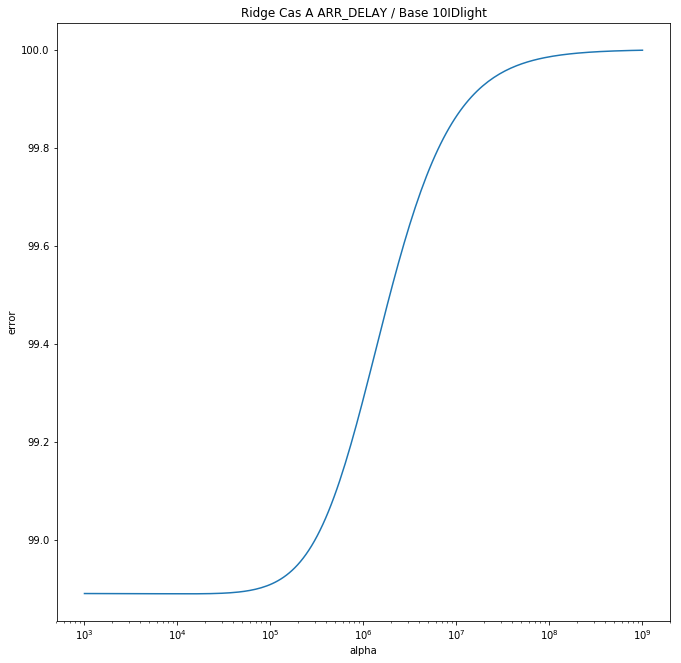

In [11]:
fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title("Ridge Cas A ARR_DELAY / Base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, error_ridge10IDlightA)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

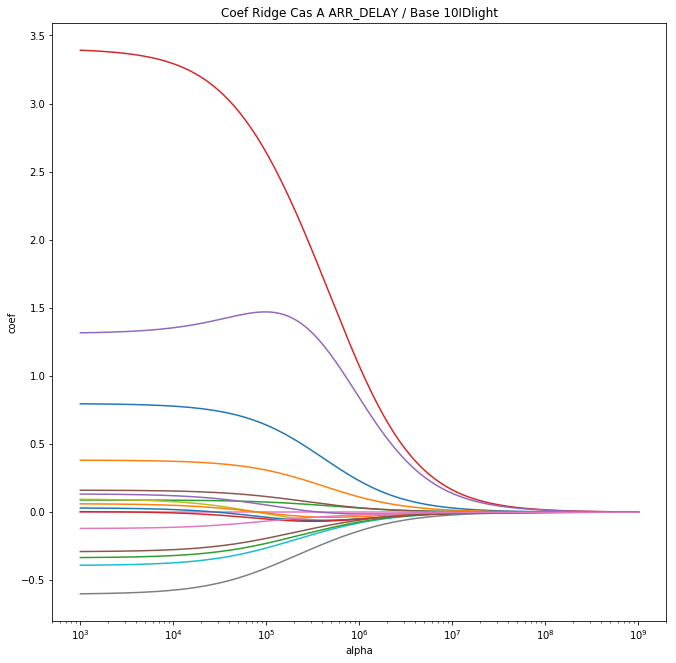

In [12]:
fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title("Coef Ridge Cas A ARR_DELAY / Base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, coef_ridge10IDlightA)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coef')
plt.show()

<span style="color:#3366ff"> Erreur très importante quel que soit Alpha (Ridge).

## Conclusion "Cas A" - ARR_DELAY

<span style="color:#3366ff"> La Régression Linéaire sur ARR_DELAY ne permet pas de prédire le temps de retard d'un vol.

# <span style="color:#6600cc">   Cas B: "y_2" = ARR_DELAY_NEW 

<span style="color:#6600cc">   ARR_DELAY_NEW = Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.

<span style="color:#6600cc">   <strong>  ==> Régression Linéaire sur Score

In [13]:
data_plane_CLEAN_y_2_full= pd.read_csv(
    'DATA_clean/data_plane_CLEAN_y_2_full.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

shapey2 = data_plane_CLEAN_y_2_full.shape

print("Cette base de données contient",shapey2[0], 
      "vols décrits avec", shapey2[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


In [14]:
data_plane_CLEAN_y_2_full.head()

,ARR_DELAY_NEW
UNIQUE_CARRIER,
DL,87.0
AS,8.0
WN,17.0
WN,0.0
B6,43.0


In [15]:
data_plane_CLEAN_y_2_full.describe()

,ARR_DELAY_NEW
count,545017.000000
mean,11.833490
std,38.126815
min,0.000000
25%,0.000000
50%,0.000000
75%,6.000000
max,1508.000000


## Machine Learning: Régréssion Linéaire "Cas B" avec ARR_DELAY_NEW

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    data_plane_CLEAN_y_2_full['ARR_DELAY_NEW'],
                                                    test_size=0.25)

In [17]:
# On crée un modèle de régression linéaire
lr10IDlightB= linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr10IDlightB.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Erreur Regression Lineaire "Cas B" avec ARR_DELAY_NEW

In [18]:
baseline_score2 = np.mean((lr10IDlightB.score(X_test, y_test)))
baseline_error2 = (100*(1 - baseline_score2))
baseline_error2

99.10848204439642

<span style="color:#3366ff"> Erreur très élevée.

## Ridge sur "Cas B" avec ARR_DELAY_NEW

In [19]:
# calcul de alpha

ridge10IDlightB = linear_model.Ridge()

n_alphas = 200
alpha_range = np.logspace(3, 9, n_alphas)

coef_ridge10IDlightB=[]
error_ridge10IDlightB=[]
for alpha_value in alpha_range:
    clf10IDlightB = ridge10IDlightB.set_params(alpha=alpha_value)
    clf10IDlightB.fit(X_train, y_train) 
    
    coef_ridge10IDlightB.append(clf10IDlightB.coef_.tolist())
    
    error_ridge10IDlightB.append(
        np.mean(100*(1 - ridge10IDlightB.score(X_test, y_test)))
    )

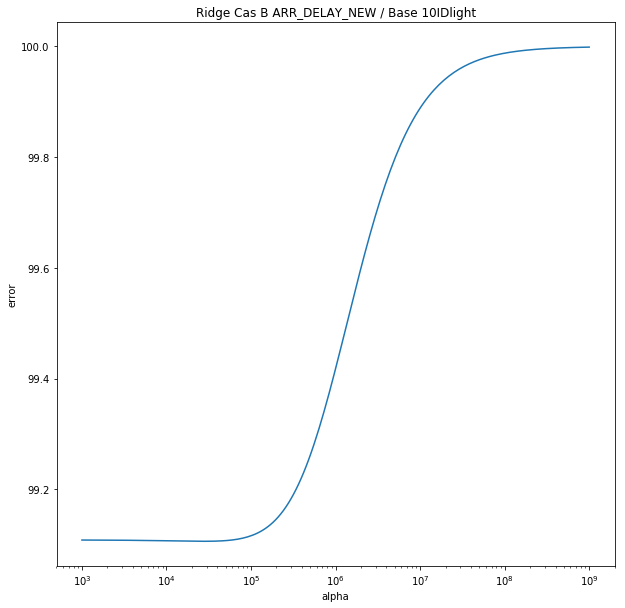

In [20]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.set_title("Ridge Cas B ARR_DELAY_NEW / Base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, error_ridge10IDlightB)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

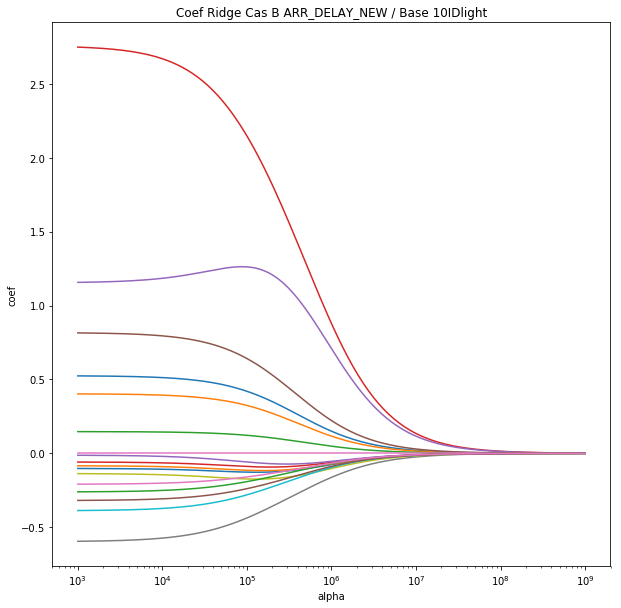

In [21]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.set_title("Coef Ridge Cas B ARR_DELAY_NEW / Base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, coef_ridge10IDlightB)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coef')
plt.show()

<span style="color:#3366ff"> Erreur très importante quel que soit Alpha (Ridge).

### Conclusion "Cas B" - ARR_DELAY_NEW

<span style="color:#3366ff"> La Régression Linéaire sur ARR_DELAY_NEW, avec une erreur de plus de 98% ne permet pas de prédire le temps de retard d'un vol.

# <span style="color:#6600cc">   "Cas C": "y_3" = ARR_DEL15

<span style="color:#6600cc">ARR_DEL15 = Arrival Delay Indicator, 15 Minutes or More (1=Yes) ===> Indicateur Binaire:     
<span style="color:#6600cc">-> 0 moins de 15 min de retard    
<span style="color:#6600cc">-> 1 plus de 15 min de retard    

<span style="color:#6600cc"><strong> ==> Régression Logistique.    
<span style="color:#6600cc"><strong> ==> SVM (classifieur binaire)

In [22]:
data_plane_CLEAN_y_3_full= pd.read_csv(
    'DATA_clean/data_plane_CLEAN_y_3_full.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

shapey3 = data_plane_CLEAN_y_3_full.shape

print("Cette base de données contient",shapey3[0], 
      "vols décrits avec", shapey3[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


In [23]:
data_plane_CLEAN_y_3_full.head()

,ARR_DEL15
UNIQUE_CARRIER,
DL,1.0
AS,0.0
WN,1.0
WN,0.0
B6,1.0


### Split Train / Test du "Cas C" avec ARR_DEL15

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    data_plane_CLEAN_y_3_full['ARR_DEL15'], 
                                                    test_size=0.25)

## Regression Logistique du "Cas C" avec ARR_DEL15

In [25]:
# On crée un modèle de régression linéaire
lr10IDlightC = linear_model.LogisticRegression()

# On entraîne ce modèle sur les données d'entrainement
lr10IDlightC.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Erreur de la Régression Logistique du "Cas C" avec ARR_DEL15

In [26]:
baseline_score3 = np.mean((lr10IDlightC.score(X_test, y_test)))
#baseline_error[0]
baseline_error3 = (100*(1 - baseline_score3))
baseline_error3

17.274228468680054

<span style="color:#3366ff"> Erreur de 17,5%.

### AUROC Regression Logistique du "Cas C" avec ARR_DEL15

In [27]:
# On récupère la prédiction de la valeur positive
y_prob = lr10IDlightC.predict_proba(X_test)[:,1] 

In [28]:
# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_prob > 0.5, 1, 0) 

In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_prob)

In [30]:
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.6177722458101541


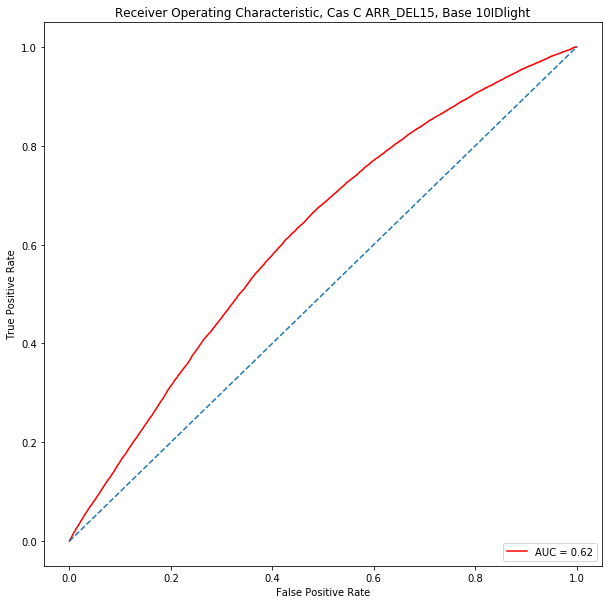

In [31]:
plt.figure(figsize=(10,10))

plt.title('Receiver Operating Characteristic, Cas C ARR_DEL15, Base 10IDlight')
plt.plot(false_positive_rate, 
         true_positive_rate, 
         color='red',
         label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<span style="color:#3366ff"> La courbe rouge au dessu de la diagonale bleue montre que ce modèle est meilleure qu'un classifieur naîf aléatoire.

### Régression Logistique avec Cross Validation du "Cas C" avec ARR_DEL15

In [32]:
# On crée un modèle de régression linéaire
lr10IDlightC_CV = linear_model.LogisticRegressionCV()

# On entraîne ce modèle sur les données d'entrainement
lr10IDlightC_CV.fit(X_scaled, data_plane_CLEAN_y_3_full['ARR_DEL15'])

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Erreur de la Régression Logistique avec Cross Validation du "Cas C" avec ARR_DEL15

In [33]:
baseline_score3 = np.mean((lr10IDlightC_CV.score(X_scaled, data_plane_CLEAN_y_3_full['ARR_DEL15'])))
#baseline_error[0]
baseline_error3 = (100*(1 - baseline_score3))
baseline_error3

17.389365836295013

<span style="color:#3366ff"> L'érreur est légèrement inférieure

## Ridge Classifier du "Cas C" avec ARR_DEL15

In [34]:
# calcul de alpha

ridge10IDlightC = linear_model.RidgeClassifier()

n_alphas = 200
alpha_range = np.logspace(3, 8, n_alphas)

coef_ridge10IDlightC=[]
error_ridge10IDlightC=[]
for alpha_value in alpha_range:
    clf10IDlightC = ridge10IDlightC.set_params(alpha=alpha_value)
    clf10IDlightC.fit(X_train, y_train) 
    
    coef_ridge10IDlightC.append(clf10IDlightC.coef_.tolist())
    
    error_ridge10IDlightC.append(
        np.mean(100*(1 - ridge10IDlightC.score(X_test, y_test)))
    )

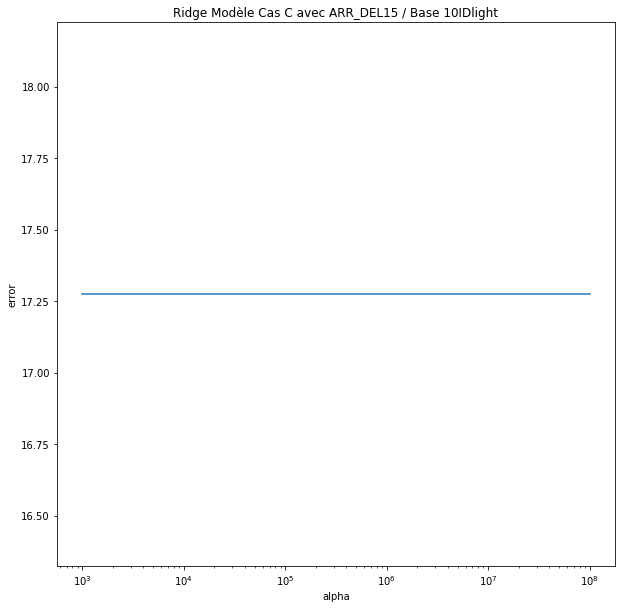

In [35]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.set_title("Ridge Modèle Cas C avec ARR_DEL15 / Base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, error_ridge10IDlightC)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

In [36]:
chain10IDlightC = itertools.chain(*coef_ridge10IDlightC)
test10IDlightC = list(chain10IDlightC)

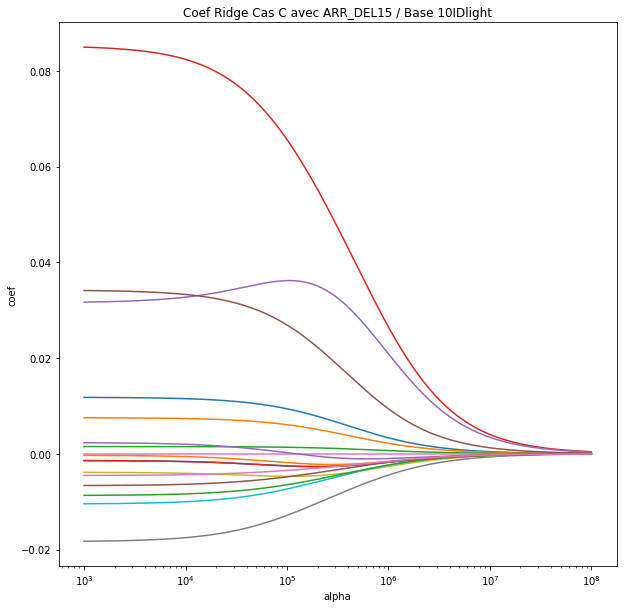

In [37]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.set_title("Coef Ridge Cas C avec ARR_DEL15 / Base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, test10IDlightC)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coef')
plt.show()

<span style="color:#3366ff"> L'erreur ne change pas quel que soit Alpha (Ridge).

## SVM du "Cas C" avec ARR_DEL15

In [38]:
svm10IDlightC = LinearSVC(max_iter=100)
params = { 'C': np.logspace(-3, 3, 7) }
svm10IDlightC.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Erreur SVM "Cas C" avec ARR_DEL15

In [39]:
err = np.mean((svm10IDlightC.score(X_test, y_test)))
err = (100*(1 - baseline_score))
err

98.8220690416656

### Courbe ROC SVM

In [40]:
y_prob_svm = svm10IDlightC.predict(X_test)

In [41]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.49960862440658466


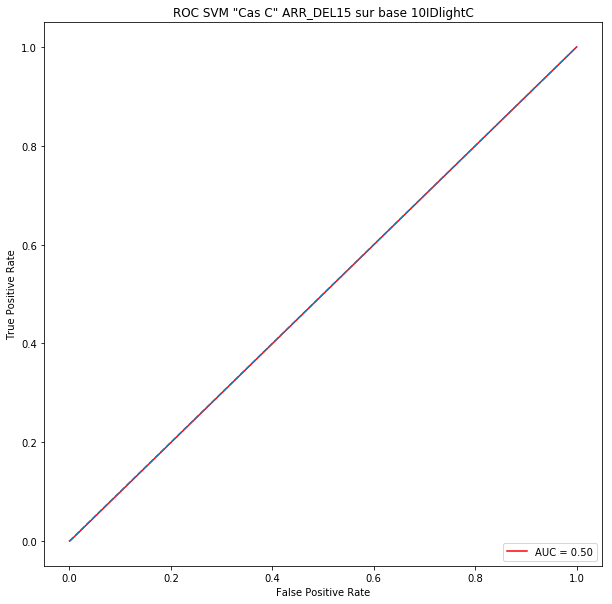

In [42]:
plt.figure(figsize=(10,10))
plt.title('ROC SVM "Cas C" ARR_DEL15 sur base 10IDlightC')

plt.plot(false_positive_rate,
         true_positive_rate, 
         color='red',
         label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<span style="color:#3366ff"> La SVM ne donne un bon résultat dans ce cas là car sa courbe ROC est la même que celle d'un classifieur aléatoire (diagonale bleue).

## Conclusion "Cas C" - ARR_DEL15

<span style="color:#3366ff"> La régréssion Logistique sur ARR_DEL15 nous permet à 17.5% de prédire si un vol va être en retard ou non.     
<span style="color:#3366ff"> si 0: retard de moins de 15 min;    
<span style="color:#3366ff"> si 1: retard de plus de 15 min

# <span style="color:#6600cc">   "Cas D": "y_4" = ARR_DELAY_GROUP

<span style="color:#6600cc">ARR_DELAY_GROUP = Arrival Delay intervals, every (15-minutes from <-15 to >180)     
<span style="color:#6600cc">(15 valeurs de - 2 à 12)  
     
<span style="color:#6600cc"><strong> ==> Prédiction Linéaire sur Score     
<span style="color:#6600cc"><strong> ==> SVM (Multiclass OVR)   

In [43]:
data_plane_CLEAN_y_4_full= pd.read_csv(
    'DATA_clean/data_plane_CLEAN_y_4_full.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

shapey4 = data_plane_CLEAN_y_4_full.shape

print("Cette base de données contient",shapey4[0], 
      "vols décrits avec", shapey4[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


In [44]:
data_plane_CLEAN_y_4_full.head()

,ARR_DELAY_GROUP
UNIQUE_CARRIER,
DL,5.0
AS,0.0
WN,1.0
WN,-1.0
B6,2.0


### Split Train / Test "Cas D" / ARR_DELAY_GROUP

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    data_plane_CLEAN_y_4_full['ARR_DELAY_GROUP'],
                                                    test_size=0.25)

## Regression Logistique du "Cas D" avec ARR_DELAY_GROUP

In [46]:
# On crée un modèle de régression linéaire
lr10IDlightD = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr10IDlightD.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
baseline_score4 = np.mean((lr10IDlightD.score(X_test, y_test)))
#baseline_error[0]
baseline_error4 = (100*(1 - baseline_score4))
baseline_error4

98.28514554871282

<span style="color:#3366ff"> Erreur très élevée.

## Ridge sur "Cas D" / ARR_DELAY_GROUP

In [48]:
# calcul de alpha

ridge10IDlightD = linear_model.Ridge()

n_alphas = 200
alpha_range = np.logspace(0, 9, n_alphas)

coef_ridge10IDlightD=[]
error_ridge10IDlightD=[]
for alpha_value in alpha_range:
    clf10IDlightD = ridge10IDlightD.set_params(alpha=alpha_value)
    clf10IDlightD.fit(X_train, y_train) 
    
    coef_ridge10IDlightD.append(clf10IDlightD.coef_.tolist())
    
    error_ridge10IDlightD.append(
        np.mean(100*(1 - ridge10IDlightD.score(X_test, y_test)))
    )

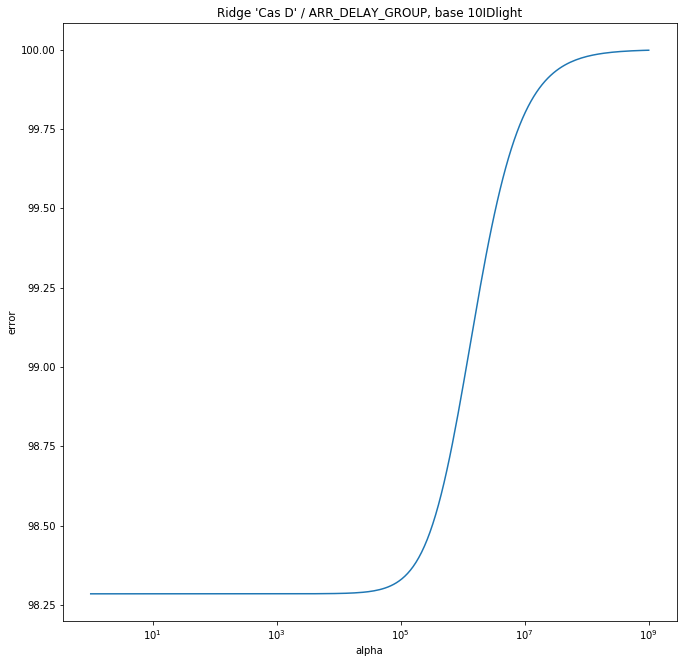

In [49]:
fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title("Ridge 'Cas D' / ARR_DELAY_GROUP, base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, error_ridge10IDlightD)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

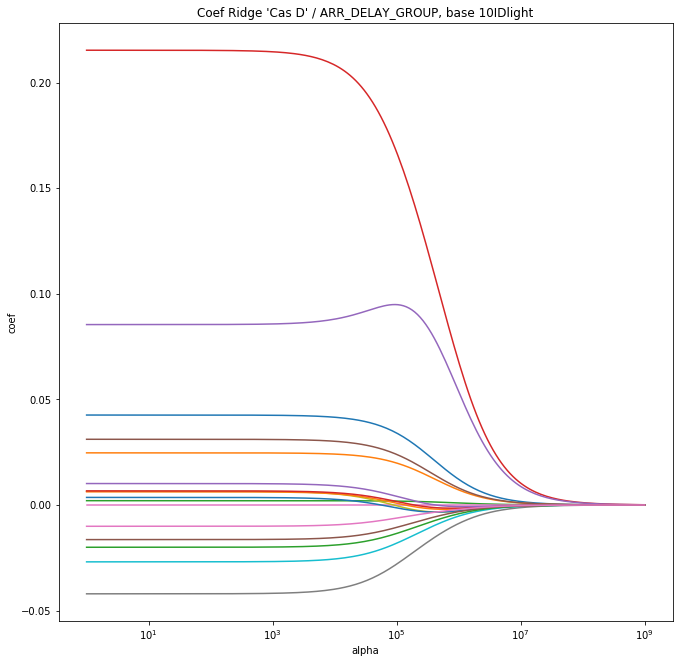

In [50]:
fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title("Coef Ridge 'Cas D' / ARR_DELAY_GROUP, base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, coef_ridge10IDlightD)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coef')
plt.show()

<span style="color:#3366ff"> L'erreur ne change pas quel que soit Alpha (Ridge).

## SVM MultiClassifier sur "Cas D" / ARR_DELAY_GROUP

In [51]:
svm10IDlightD = LinearSVC(multi_class = "ovr", max_iter=100)
params = { 'C': np.logspace(-3, 3, 7) }
svm10IDlightD.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [52]:
y_prob_svm = svm10IDlightD.predict(X_test)

### Erreur SVM MultiClassifieur "Cas D" / ARR_DELAY_GROUP

In [53]:
baseline_error = []
lab = [-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12]
for labels in lab:
    err = np.mean((svm10IDlightD.score(X_test, y_test==labels)))
    err = (100*(1 - baseline_score))
    baseline_error.append(err)
    
error = np.mean(baseline_error)
error

98.8220690416656

<span style="color:#3366ff"> Erreur moyenne très élevée.

In [54]:
# Use label_binarize to be multi-label like settings
Y = label_binarize(data_plane_CLEAN_y_4_full['ARR_DELAY_GROUP'], classes=[-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    Y,
                                                    test_size=.5,
                                                    )

# We use OneVsRestClassifier for multi-label prediction
# Run classifier
classifier = OneVsRestClassifier(LinearSVC(max_iter=100))
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [55]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Precision moyenne, micro-moyennée sur les 15 classes: {0:0.2f}'
      .format(average_precision["micro"]))

Precision moyenne, micro-moyennée sur les 15 classes: 0.37


Text(0.5,1,'Precision moyenne, micro-moyennée sur les 15 classes: Precision Moyenne=0.37')

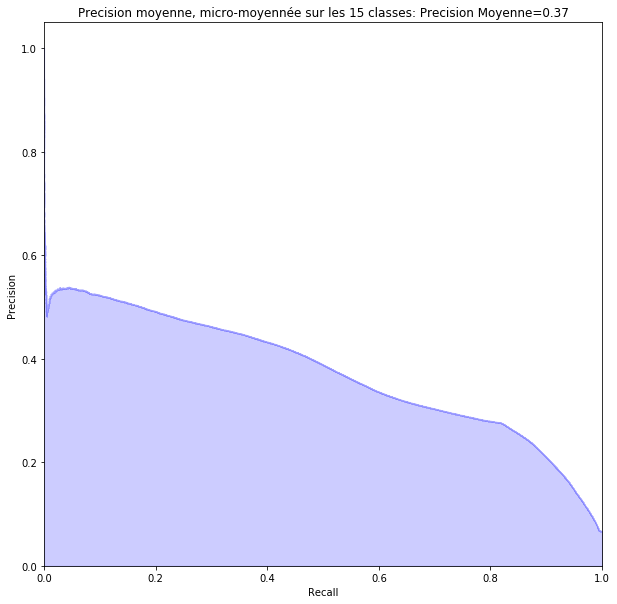

In [56]:
plt.figure(figsize=(10,10))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Precision moyenne, micro-moyennée sur les 15 classes: Precision Moyenne={0:0.2f}'
    .format(average_precision["micro"]))

<span style="color:#3366ff"> Précision inférieure à 0.5. Précision moyenne de 0.36.

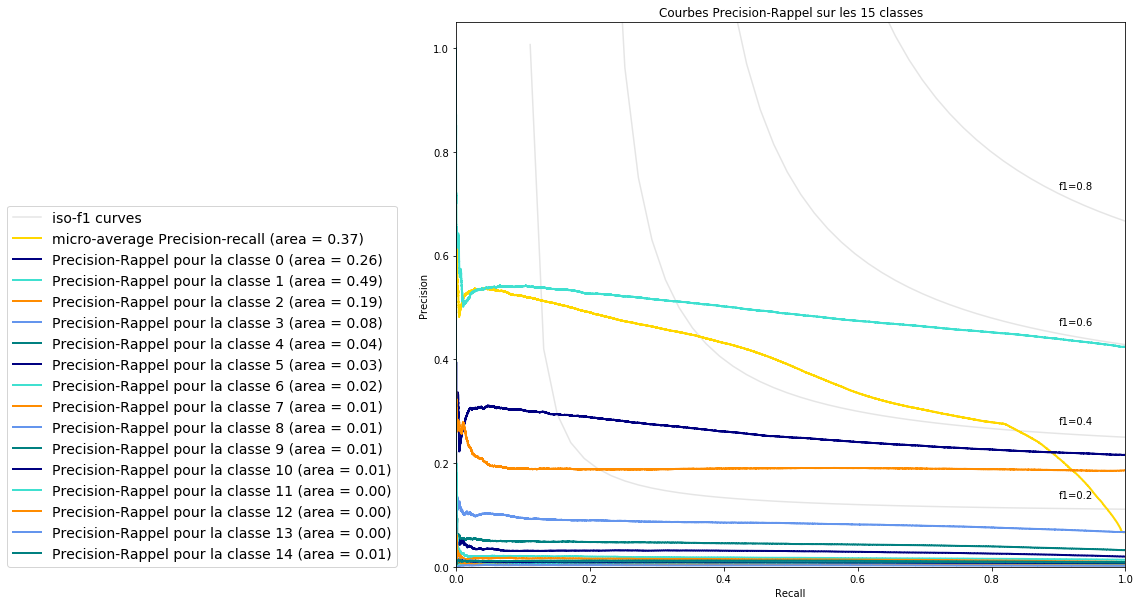

In [57]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(12, 12))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-Rappel pour la classe {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbes Precision-Rappel sur les 15 classes')
plt.legend(lines, labels, loc=(-.67, 0), prop=dict(size=14))


plt.show()

<span style="color:#3366ff"> La précision vaut environ 0 pour la majorité des classes.

### Conclusion "Cas D"  / ARR_DELAY_GROUP

<span style="color:#3366ff"> Ni la régréssion linéaire, ni la SVM multiclassifieur du Cas D ne permettent de prédire le retard d'un vol en minutes.

# <span style="color:#6600cc">    "Cas E": "y_5" = DEP_DELAY

<span style="color:#6600cc">CRS Arrival Time Block, Hourly Intervals

<span style="color:#6600cc"><strong> ==> Regréssion Linéaire

In [58]:
data_plane_CLEAN_y_5_full= pd.read_csv(
    'DATA_clean/data_plane_CLEAN_y_5_full.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

shapey5 = data_plane_CLEAN_y_5_full.shape

print("Cette base de données contient",shapey5[0], 
      "vols décrits avec", shapey5[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


In [59]:
data_plane_CLEAN_y_5_full.head()

,DEP_DELAY
UNIQUE_CARRIER,
DL,94.0
AS,-1.0
WN,-2.0
WN,-8.0
B6,25.0


### Split Train / Test du "Cas E" / DEP_DELAY

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    data_plane_CLEAN_y_5_full['DEP_DELAY'],
                                                    test_size=0.25)

## Regression Lineaire du "Cas E" / DEP_DELAY

In [61]:
# On crée un modèle de régression linéaire
lr10IDlightE = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr10IDlightE.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Erreur Regression Lineaire  du "Cas E" avec DEP_DELAY

In [62]:
baseline_score = np.mean((lr10IDlightE.score(X_train, y_train)))
#baseline_error[0]
baseline_error = (100*(1 - baseline_score))
baseline_error

98.57418226983069

<span style="color:#3366ff"> Erreur très élevée.

## Ridge sur "Cas E" /  DEP_DELAY

In [63]:
# calcul de alpha

ridge10IDlightE = linear_model.Ridge()

n_alphas = 200
alpha_range = np.logspace(3, 9, n_alphas)

coef_ridge10IDlightE=[]
error_ridge10IDlightE=[]
for alpha_value in alpha_range:
    clf10IDlightE = ridge10IDlightE.set_params(alpha=alpha_value)
    clf10IDlightE.fit(X_train, y_train) 
    
    coef_ridge10IDlightE.append(clf10IDlightE.coef_.tolist())
    
    error_ridge10IDlightE.append(
        np.mean(100*(1 - ridge10IDlightE.score(X_test, y_test)))
    )

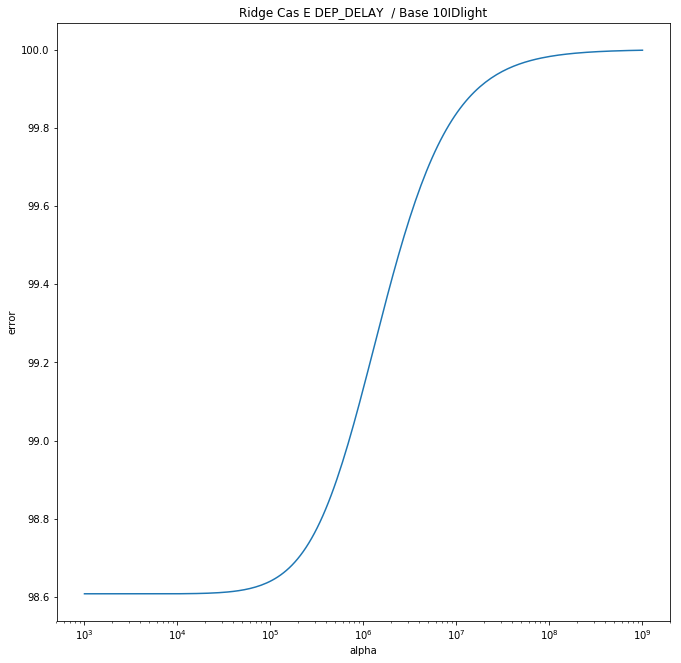

In [64]:
fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title("Ridge Cas E DEP_DELAY  / Base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, error_ridge10IDlightE)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

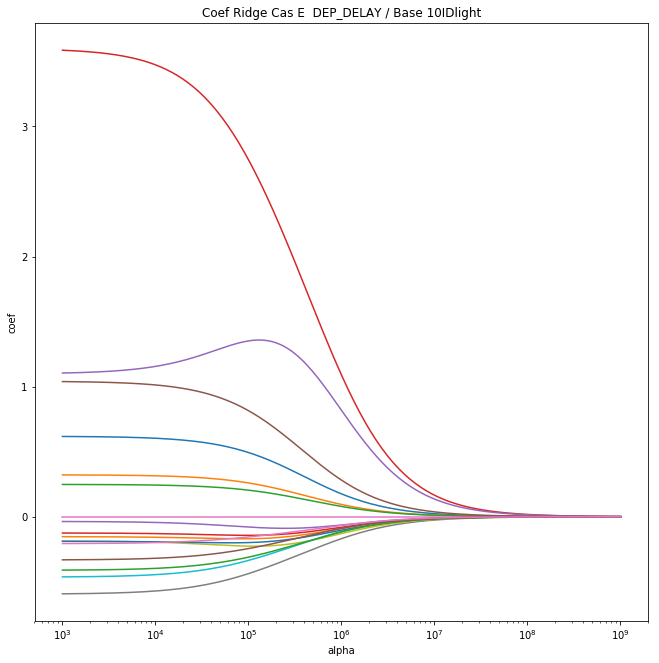

In [65]:
fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title("Coef Ridge Cas E  DEP_DELAY / Base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, coef_ridge10IDlightE)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coef')
plt.show()

<span style="color:#3366ff"> Erreur très élevée quelle que soit la valeur de alpha.

### Conclusion "Cas E" = DEP_DELAY

<span style="color:#3366ff"> La Régréssion Linéaire sur DEP_DELAY ne permet pas de prédire le nombre de minutes de retard d'un vol.

# <span style="color:#6600cc">   "Cas F": "y_6" = DEP_DELAY_NEW

<span style="color:#6600cc">Difference in minutes between scheduled and actual departure time. Early departures set to 0.

<span style="color:#6600cc"><strong> ==> Régréssion Linéaire    

In [66]:
data_plane_CLEAN_y_6_full= pd.read_csv(
    'DATA_clean/data_plane_CLEAN_y_6_full.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

shapey6 = data_plane_CLEAN_y_6_full.shape

print("Cette base de données contient",shapey6[0], 
      "vols décrits avec", shapey6[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


In [67]:
data_plane_CLEAN_y_6_full.head()

,DEP_DELAY_NEW
UNIQUE_CARRIER,
DL,94.0
AS,0.0
WN,0.0
WN,0.0
B6,25.0


### Split Train / Test "Cas F" avec  DEP_DELAY_NEW

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    data_plane_CLEAN_y_6_full['DEP_DELAY_NEW'],
                                                    test_size=0.25)

## Machine Learning: Régréssion Linéaire "Cas F" avec  DEP_DELAY_NEW

In [69]:
# On crée un modèle de régression linéaire
lr10IDlightF = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr10IDlightF.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Erreur Regression Lineaire du "Cas F" avec  DEP_DELAY_NEW

In [70]:
baseline_score = np.mean((lr10IDlightF.score(X_train, y_train)))
#baseline_error[0]
baseline_error = (100*(1 - baseline_score))
baseline_error

98.75199809051416

<span style="color:#3366ff"> Erreur très élevée.

## Ridge sur "Cas F" avec  DEP_DELAY_NEW

In [71]:
# calcul de alpha

ridge10IDlightF = linear_model.Ridge()

n_alphas = 200
alpha_range = np.logspace(3, 9, n_alphas)

coef_ridge10IDlightF=[]
error_ridge10IDlightF=[]
for alpha_value in alpha_range:
    clf10IDlightF = ridge10IDlightF.set_params(alpha=alpha_value)
    clf10IDlightF.fit(X_train, y_train) 
    
    coef_ridge10IDlightF.append(clf10IDlightF.coef_.tolist())
    
    error_ridge10IDlightF.append(
        np.mean(100*(1 - ridge10IDlightF.score(X_test, y_test)))
    )

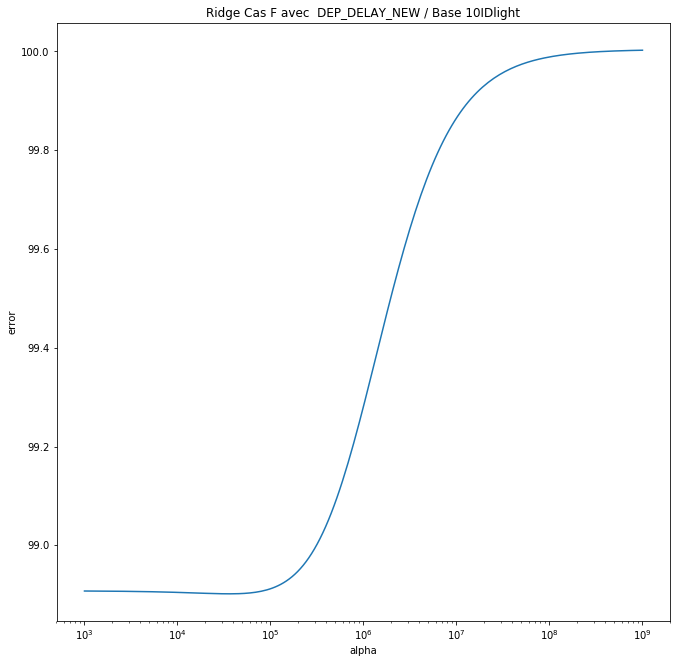

In [72]:
fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title("Ridge Cas F avec  DEP_DELAY_NEW / Base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, error_ridge10IDlightF)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

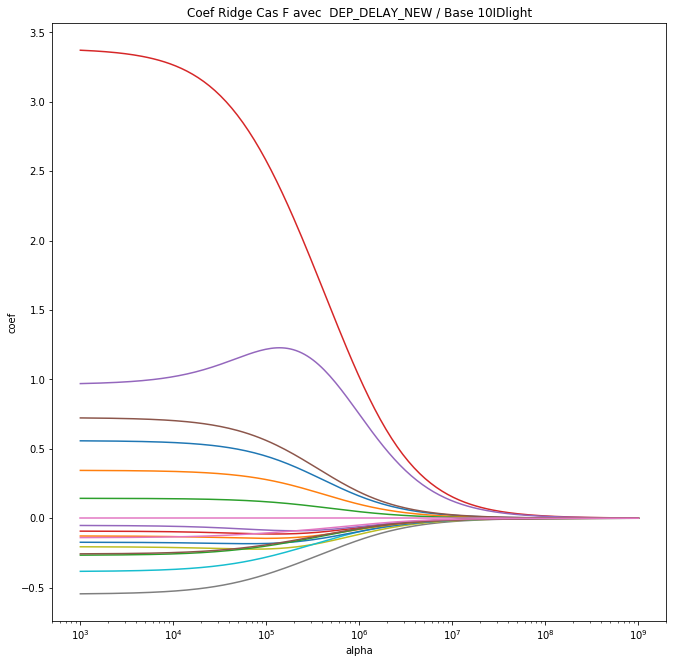

In [73]:
fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title("Coef Ridge Cas F avec  DEP_DELAY_NEW / Base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, coef_ridge10IDlightF)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coef')
plt.show()

<span style="color:#3366ff"> Erreur très élevée quelque soit la valeur de alpha.

# Conclusion "Cas F" avec  DEP_DELAY_NEW

<span style="color:#3366ff"> La Régression Linéaire sur avec  DEP_DELAY_NEW ne permet pas de prédire le nombre de minutes de retard d'un vol.

# <span style="color:#6600cc"> "Cas G": "y_7" = DEP_DEL15

<span style="color:#6600cc"> Departure Delay Indicator, 15 Minutes or More (1=Yes)    

<span style="color:#6600cc"> <strong> ==> Regréssion Logistique

In [74]:
data_plane_CLEAN_y_7_full= pd.read_csv(
    'DATA_clean/data_plane_CLEAN_y_7_full.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

shapey7 = data_plane_CLEAN_y_7_full.shape

print("Cette base de données contient",shapey7[0], 
      "vols décrits avec", shapey7[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


In [75]:
data_plane_CLEAN_y_7_full.head()

,DEP_DEL15
UNIQUE_CARRIER,
DL,1.0
AS,0.0
WN,0.0
WN,0.0
B6,1.0


In [76]:
data_plane_CLEAN_y_7_full.describe()

,DEP_DEL15
count,545017.000000
mean,0.171343
std,0.376809
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Split Train / Test "Cas G" / DEP_DEL15 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    data_plane_CLEAN_y_7_full['DEP_DEL15'], 
                                                    test_size=0.25)

## Regression Logistique "Cas G" / DEP_DEL15

In [78]:
# On crée un modèle de régression linéaire
lr10IDlightG = linear_model.LogisticRegression()

# On entraîne ce modèle sur les données d'entrainement
lr10IDlightG.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Erreur Regression Logistique du Cas G / DEP_DEL15

In [79]:
baseline_score3 = np.mean((lr10IDlightG.score(X_test, y_test)))
#baseline_error[0]
baseline_error3 = (100*(1 - baseline_score3))
baseline_error3

17.23826648563356

<span style="color:#3366ff"> La Régression Logistique sur DEP_DEL_15 permet de prédire avec une érreur de 17.2% prêt si un vol va être en retard ou non:
    
<span style="color:#3366ff"> si 0: retard de moins de 15 min;    
<span style="color:#3366ff"> si 1: retard de plus de 15 min     

### AUROC Regression Logistique "Cas G" / DEP_DEL15

In [80]:
# On récupère la prédiction de la valeur positive
y_prob = lr10IDlightG.predict_proba(X_test)[:,1] 

# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_prob > 0.5, 1, 0) 

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.6339214548953982


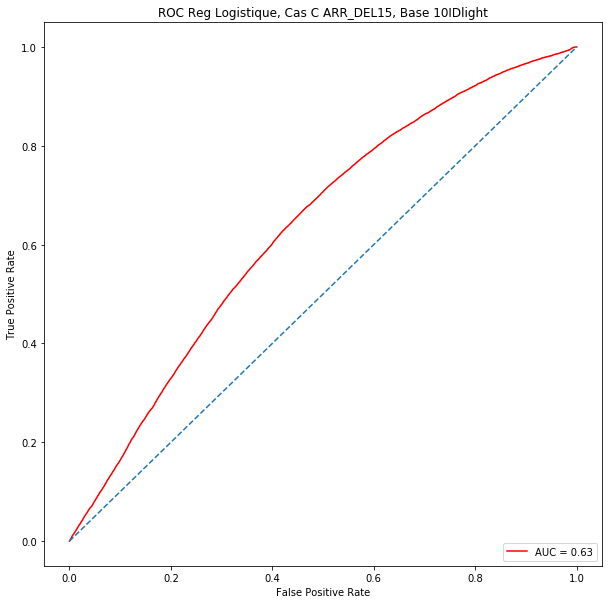

In [81]:
plt.figure(figsize=(10,10))

plt.title('ROC Reg Logistique, Cas C ARR_DEL15, Base 10IDlight')
plt.plot(false_positive_rate, 
         true_positive_rate, 
         color='red',
         label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<span style="color:#3366ff"> La courbe rouge au dessu de la diagonale bleue montre que ce modèle est meilleure qu'un classifieur naîf aléatoire.

### Regression Logistique avec Cross Validation du Cas G / DEP_DEL15

In [82]:
# On crée un modèle de régression linéaire
lr10IDlightG_CV = linear_model.LogisticRegressionCV()

# On entraîne ce modèle sur les données d'entrainement
lr10IDlightG_CV.fit(X_scaled, data_plane_CLEAN_y_7_full['DEP_DEL15'])

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

### Erreur Regression Logistique avec Cross Validation du Cas G / DEP_DEL15

In [83]:
baseline_score3 = np.mean((lr10IDlightG_CV.score(X_scaled, data_plane_CLEAN_y_7_full['DEP_DEL15'])))
#baseline_error[0]
baseline_error3 = (100*(1 - baseline_score3))
baseline_error3

17.134327920046534

<span style="color:#3366ff"> L'érreur est legerement inférieure en CV.

## Ridge Classifier sur "Cas G" / DEP_DEL15

In [84]:
# calcul de alpha

ridge10IDlightG = linear_model.RidgeClassifier()

n_alphas = 200
alpha_range = np.logspace(2, 9, n_alphas)

coef_ridge10IDlightG=[]
error_ridge10IDlightG=[]
for alpha_value in alpha_range:
    clf10IDlightG = ridge10IDlightG.set_params(alpha=alpha_value)
    clf10IDlightG.fit(X_train, y_train) 
    
    coef_ridge10IDlightG.append(clf10IDlightG.coef_.tolist())
    
    error_ridge10IDlightG.append(
        np.mean(100*(1 - ridge10IDlightG.score(X_test, y_test)))
    )

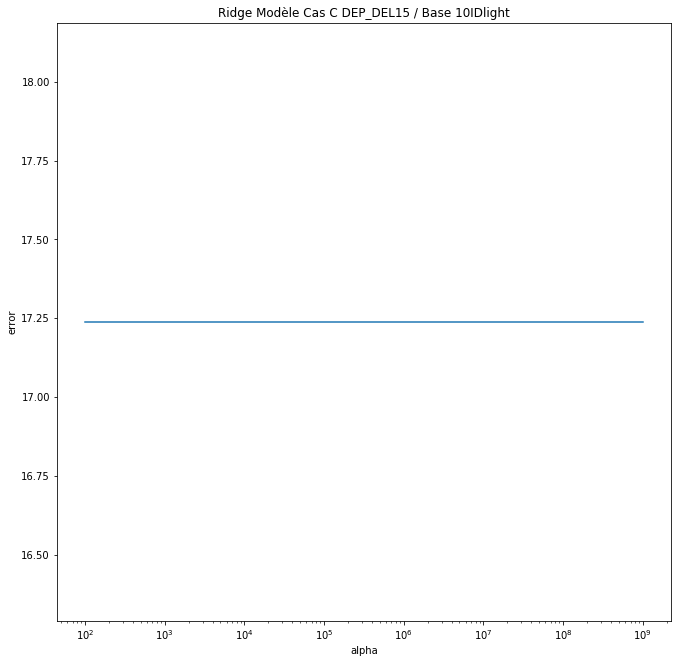

In [85]:
fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title("Ridge Modèle Cas C DEP_DEL15 / Base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, error_ridge10IDlightG)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

In [86]:
chain10IDlightG = itertools.chain(*coef_ridge10IDlightG)
test10IDlightG = list(chain10IDlightG)

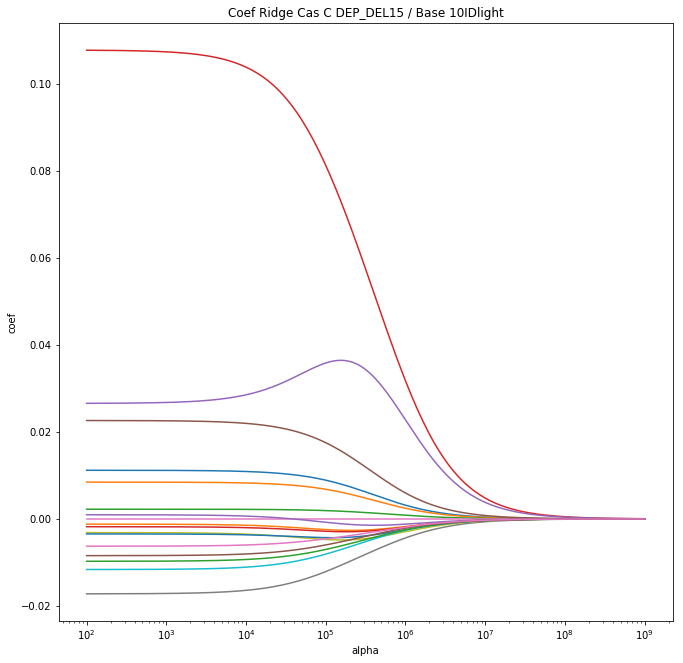

In [87]:
fig = plt.figure(figsize=(11,11))
ax = plt.subplot()
ax.set_title("Coef Ridge Cas C DEP_DEL15 / Base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, test10IDlightG)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coef')
plt.show()

<span style="color:#3366ff"> L'érreur ne change pas quelque soit la valeur de alpha.

## SVM sur "Cas G" / DEP_DEL15

In [88]:
svm10IDlightG = LinearSVC(max_iter=100)
params = { 'C': np.logspace(-3, 3, 7) }
svm10IDlightG.fit(X_train, y_train)

y_prob_svm = svm10IDlightG.predict(X_test)

### Erreur SVM sur "Cas G" / DEP_DEL15

In [89]:
err = np.mean((svm10IDlightG.score(X_test, y_test)))
err = (100*(1 - baseline_score))
err

98.75199809051416

<span style="color:#3366ff"> érreur très élevée.

### Courbe ROC SVM

In [90]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.5


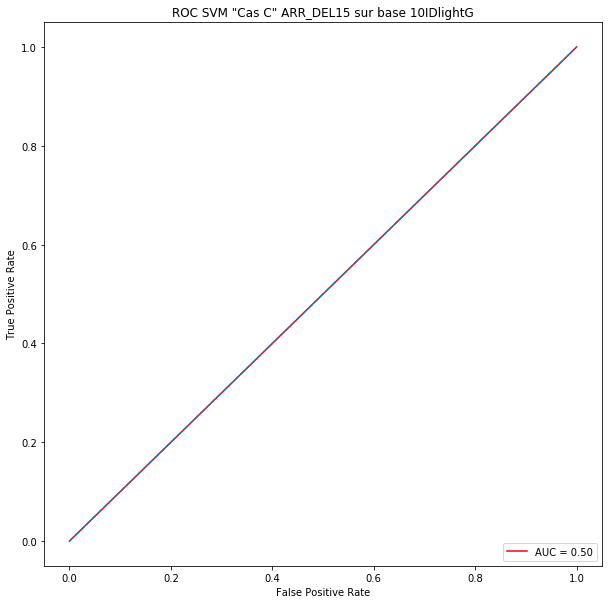

In [91]:
plt.figure(figsize=(10,10))
plt.title('ROC SVM "Cas C" ARR_DEL15 sur base 10IDlightG')

plt.plot(false_positive_rate,
         true_positive_rate, 
         color='red',
         label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<span style="color:#3366ff"> La SVM ne donne un bon résultat dans ce cas là car sa courbe ROC est la même que celle d'un classifieur aléatoire (diagonale bleue).

# Conclusion "Cas G" avec DEP_DEL15

<span style="color:#3366ff"> La régréssion Logistique sur DEP_DEL15 nous permet à 17.5% de prédire si un vol va être en retard ou non.     
<span style="color:#3366ff"> si 0: retard de moins de 15 min;    
<span style="color:#3366ff"> si 1: retard de plus de 15 min

# <span style="color:#6600cc">    "Cas H": "y_8" = DEP_DELAY_GROUP

<span style="color:#6600cc">Departure Delay intervals, every (15 minutes from <-15 to >180)    
<span style="color:#6600cc">(15 valeurs de - 2 à 12)    

<span style="color:#6600cc"><strong> ==> Régression Linéaire  
<span style="color:#6600cc"><strong> ==> SVM (multiclassifieur)    

In [92]:
data_plane_CLEAN_y_8_full= pd.read_csv(
    'DATA_clean/data_plane_CLEAN_y_8_full.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

shapey8 = data_plane_CLEAN_y_8_full.shape

print("Cette base de données contient",shapey8[0], 
      "vols décrits avec", shapey8[1], "paramètres.")

Cette base de données contient 545017 vols décrits avec 1 paramètres.


In [93]:
data_plane_CLEAN_y_8_full.head()

,DEP_DELAY_GROUP
UNIQUE_CARRIER,
DL,6.0
AS,-1.0
WN,-1.0
WN,-1.0
B6,1.0


### Split Train / Test "Cas G" avec DEP_DELAY_GROUP

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    data_plane_CLEAN_y_8_full['DEP_DELAY_GROUP'], 
                                                    test_size=0.25)

## Regression Linéaire "Cas H" / DEP_DELAY_GROUP

In [95]:
# On crée un modèle de régression linéaire
lr10IDlightH = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr10IDlightH.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Erreur Regression Linéaire "Cas G" / DEP_DELAY_GROUP

In [96]:
baseline_score4 = np.mean((lr10IDlightH.score(X_test, y_test)))
#baseline_error[0]
baseline_error4 = (100*(1 - baseline_score4))
baseline_error4

97.663580272183

<span style="color:#3366ff"> Erreur très élevée.

## Régularisation Ridge, "Cas G" / DEP_DELAY_GROUP

In [97]:
# calcul de alpha

ridge10IDlightH = linear_model.Ridge()

n_alphas = 200
alpha_range = np.logspace(0, 9, n_alphas)

coef_ridge10IDlightH=[]
error_ridge10IDlightH=[]
for alpha_value in alpha_range:
    clf10IDlightH = ridge10IDlightH.set_params(alpha=alpha_value)
    clf10IDlightH.fit(X_train, y_train) 
    
    coef_ridge10IDlightH.append(clf10IDlightH.coef_.tolist())
    
    error_ridge10IDlightH.append(
        np.mean(100*(1 - ridge10IDlightH.score(X_test, y_test)))
    )

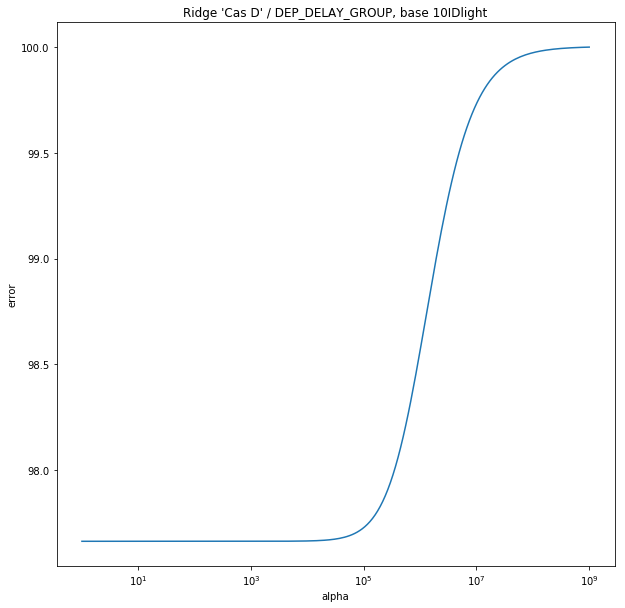

In [98]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.set_title("Ridge 'Cas D' / DEP_DELAY_GROUP, base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, error_ridge10IDlightH)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

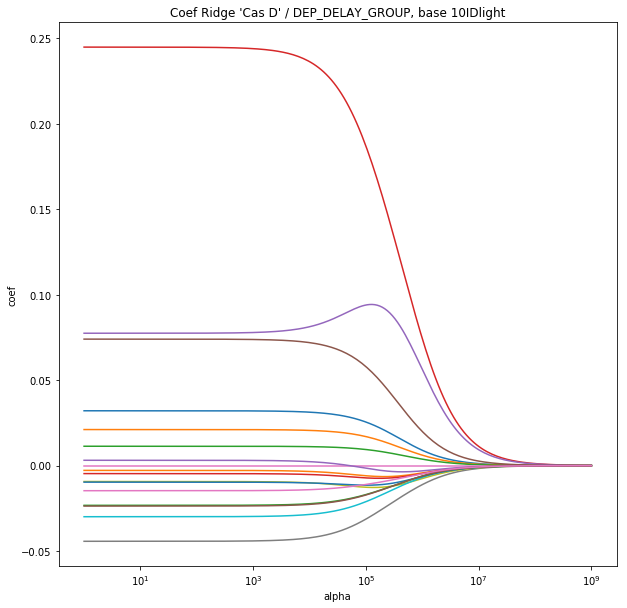

In [99]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.set_title("Coef Ridge 'Cas D' / DEP_DELAY_GROUP, base 10IDlight")

ax=plt.gca()
ax.plot(alpha_range, coef_ridge10IDlightH)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coef')
plt.show()

<span style="color:#3366ff"> Erreur très élevée quelque soit la valeur de alpha.

## SVM MultiClassifieur sur "Cas G" / DEP_DELAY_GROUP

In [100]:
svm10IDlightH = LinearSVC(multi_class = "ovr" , max_iter = 100)
params = { 'C': np.logspace(-3, 3, 7) }

svm10IDlightH.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=100,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

### Erreur SVM MultiClassifieur "Cas G" / DEP_DELAY_GROUP

In [101]:
baseline_error = []
lab = [-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12]
for labels in lab:
    err = np.mean((svm10IDlightH.score(X_test, y_test==labels)))
    err = (100*(1 - baseline_score))
    baseline_error.append(err)
    
error = np.mean(baseline_error)
error

98.75199809051418

<span style="color:#3366ff"> Erreur très élevée.

### Precision / Rappel / F1 Score SVM MultiClassifieur "Cas G" / DEP_DELAY_GROUP

In [102]:
# Use label_binarize to be multi-label like settings
Y = label_binarize(data_plane_CLEAN_y_8_full['DEP_DELAY_GROUP'], classes=[-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    Y,
                                                    test_size=.5
                                                    )

# We use OneVsRestClassifier for multi-label prediction
# Run classifier
classifier = OneVsRestClassifier(LinearSVC(max_iter=100))
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [103]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Precision moyenne, micro-moyennée sur les 15 classes: {0:0.2f}'
      .format(average_precision["micro"]))

Precision moyenne, micro-moyennée sur les 15 classes: 0.55


Text(0.5,1,'Precision moyenne, micro-moyennée sur les 15 classes: Precision moyenne=0.55')

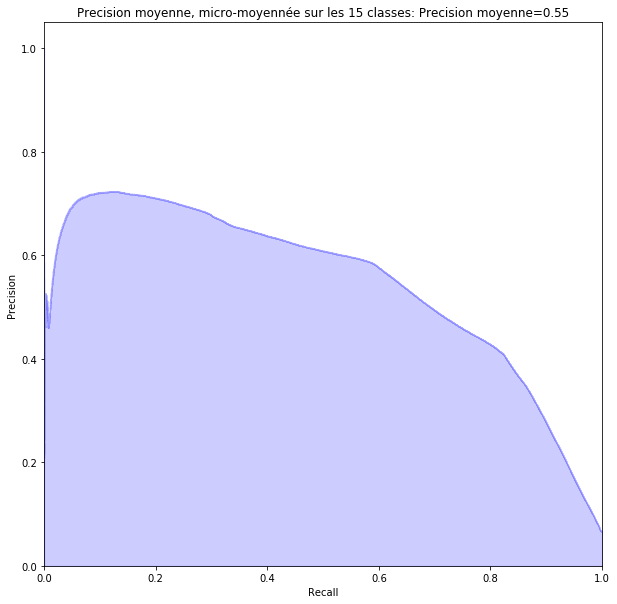

In [104]:
plt.figure(figsize=(10,10))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Precision moyenne, micro-moyennée sur les 15 classes: Precision moyenne={0:0.2f}'
    .format(average_precision["micro"]))

<span style="color:#3366ff"> Précision moyenne de 0.55.

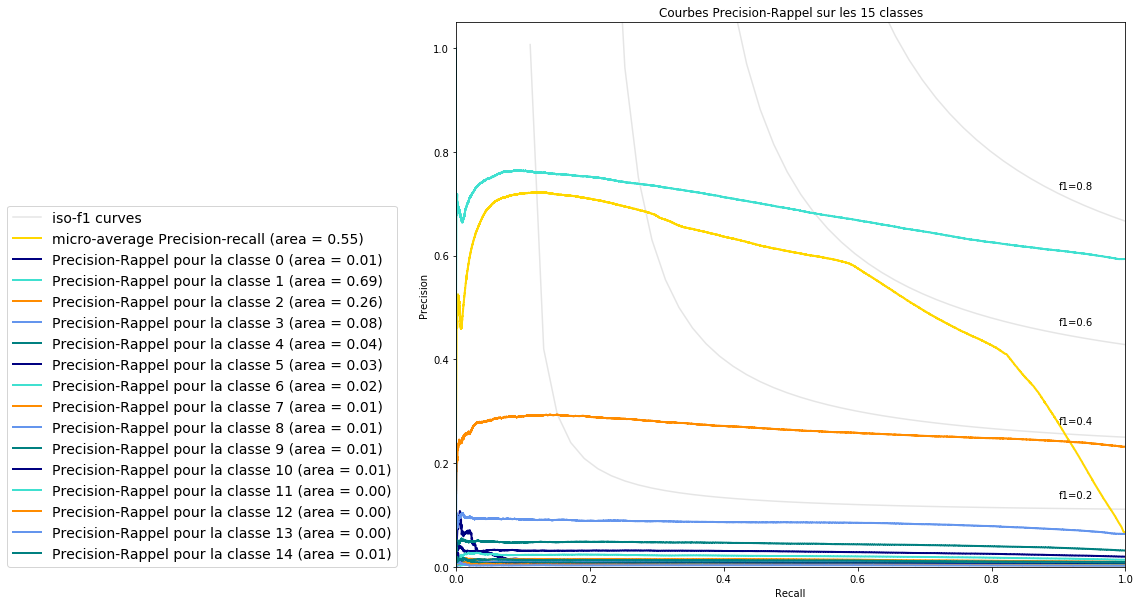

In [105]:
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(12, 12))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-Rappel pour la classe {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbes Precision-Rappel sur les 15 classes')
plt.legend(lines, labels, loc=(-.67, 0), prop=dict(size=14))


plt.show()

<span style="color:#3366ff"> La précision vaut environ 0 pour la majorité des classes.

## Conclusion "Cas G" / DEP_DELAY_GROUP

<span style="color:#3366ff"> Ni la régréssion linéaire, ni la SVM multiclassifieur du Cas G ne permettent de prédire le retard d'un vol en minutes.

# CONCLUSION des diffèrents modèles

<span><table class="wikitable">
<tr>
<th>Cas</th>
<th>"y"</th>
<th>Erreur Rég Linéaire (%)</th>
<th>Erreur Rég Logistique (%)</th>
<th>AUROC Reg Logistique</th>
<th>Erreur SVM (%)</th>
<th>Precision SVM Classifieur</th>
<th>Intérêt</th>
</tr>
<tr>
<td>A</td>
<td>ARR_DELAY</td>
<td>98.8</td>
<td>NA</td>
<td>NA</td>
<td>NA</td>
<td>NA</td>
<td>-</td>
</tr>
<tr>
<td>B</td>
<td>ARR_DELAY_NEW</td>
<td>98.93</td>
<td>NA</td>
<td>NA</td>
<td>NA</td>
<td>NA</td>
<td>-</td>
</tr>
<tr>
<td>C</td>
<td>ARR_DEL15</td>
<td>NA</td>
<td>17.22</td>
<td>0.63</td>
<td>98.8</td>
<td>NA</td>
<td>+ (Reg Log)</td>
</tr>
<tr>
<td>D</td>
<td>ARR_DELAY_GROUP</td>
<td>98.27</td>
<td>NA</td>
<td>NA</td>
<td>98.8</td>
<td>0.36</td>
<td>-</td>
</tr>
<tr>
<td>E</td>
<td>DEP_DELAY</td>
<td>98.59</td>
<td>NA</td>
<td>NA</td>
<td>NA</td>
<td>NA</td>
<td>-</td>
</tr>
<tr>
<td>F</td>
<td>DEP_DELAY_NEW</td>
<td>98.78</td>
<td>NA</td>
<td>NA</td>
<td>NA</td>
<td>NA</td>
<td>-</td>
</tr>
<tr>
<td>G</td> 
<td>DEP_DEL15</td>
<td>NA</td>
<td>17.22</td>
<td>0.63</td>
<td>98.78</td>
<td>NA</td>
<td>+ (Reg Log)</td>
</tr>
<tr>
<td>H</td>
<td>DEP_DELAY_GROUP</td>
<td>97.56</td>
<td>NA</td>
<td>NA</td>
<td>98.78</td>
<td>0.5</td>
<td>-</td>
</tr>
</table>

<span style="color:#3366ff"> Le modèle de prédiction le plus fiable est la régression logistique sur DEP_DEL15 ou ARR_DEL15.
<span style="color:#3366ff"> Il nous permet avec une erreur de 17% de prédire si un vol sera:    
<span style="color:#3366ff"> à l'heure à 14 minutes près (si 0);     
<span style="color:#3366ff"> en retard de plus de 15 minutes (si 1).